<a href="https://colab.research.google.com/github/YadavSanjay/DL_learning/blob/master/DLwithPython_keras_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Review on IMDB**

In [1]:
from keras.datasets import imdb
(train_data,train_labels), (test_data,test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


In [2]:
word_idx = imdb.get_word_index()
idx_word = dict([(idx,word) for word,idx in word_idx.items()])
' '.join([idx_word.get(idx -3,'?') for idx in test_data[0]])

1646592/1641221 [==============================] - 0s 0us/step


"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

In [3]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [5]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [6]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 46ms/step - loss: 0.5306 - acc: 0.7692 - val_loss: 0.3879 - val_acc: 0.8628
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3012 - acc: 0.9017 - val_loss: 0.3147 - val_acc: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 32ms/step - loss: 0.2168 - acc: 0.9278 - val_loss: 0.2770 - val_acc: 0.8906
Epoch 4/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1699 - acc: 0.9437 - val_loss: 0.2923 - val_acc: 0.8812
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1347 - acc: 0.9574 - val_loss: 0.2893 - val_acc: 0.8863
Epoch 6/20
30/30 [==============================] - 1s 32ms/step - loss: 0.1093 - acc: 0.9655 - val_loss: 0.3590 - val_acc: 0.8738
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.0914 - acc: 0.9723 - val_loss: 0.3312 - val_acc: 0.8810
Epoch 8/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0767 - a

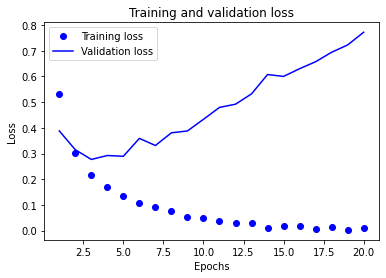

In [7]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

epochs = range(1, len(acc_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

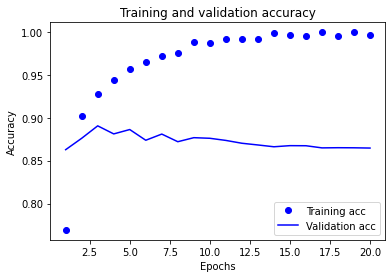

In [8]:
plt.clf()
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.8446 - acc: 0.8495


In [9]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 25ms/step - loss: 0.4666 - accuracy: 0.8169
Epoch 2/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2627 - accuracy: 0.9063
Epoch 3/4
49/49 [==============================] - 1s 25ms/step - loss: 0.2028 - accuracy: 0.9266
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3097 - accuracy: 0.8786


In [10]:
model.predict(x_test)

array([[0.13370892],
       [0.9984793 ],
       [0.6916667 ],
       ...,
       [0.06056926],
       [0.04979506],
       [0.55343986]], dtype=float32)

**Newswire Classification - Multiclass classification**

In [11]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2113536/2110848 [==============================] - 0s 0us/step


In [12]:
print(len(train_data))
print(len(test_data))
print(train_data[10])

8982
2246
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [13]:
word_index = reuters.get_word_index()
index_words = dict([(index,word) for (word,index) in word_index.items()])
decoded_newswire = ' '.join([index_words.get(i-3, '?') for i in train_data[0]])
#print(decoded_newswire)

557056/550378 [==============================] - 0s 0us/step


In [14]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [16]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_10 (Dense)             (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 49ms/step - loss: 2.5824 - accuracy: 0.5436 - val_loss: 1.7163 - val_accuracy: 0.6350
Epoch 2/20
16/16 [==============================] - 1s 42ms/step - loss: 1.4083 - accuracy: 0.7169 - val_loss: 1.2916 - val_accuracy: 0.7350
Epoch 3/20
16/16 [==============================] - 1s 41ms/step - loss: 1.0441 - accuracy: 0.7776 - val_loss: 1.1301 - val_accuracy: 0.7550
Epoch 4/20
16/16 [==============================] - 1s 41ms/step - loss: 0.8258 - accuracy: 0.8254 - val_loss: 1.0379 - val_accuracy: 0.7810
Epoch 5/20
16/16 [==============================] - 1s 40ms/step - loss: 0.6610 - accuracy: 0.8614 - val_loss: 0.9832 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 1s 41ms/step - loss: 0.5334 - accuracy: 0.8936 - val_loss: 0.9480 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 1s 42ms/step - loss: 0.4302 - accuracy: 0.9143 - val_loss: 0.9169 - val_accuracy: 0.8060
Epoch 8/20
16

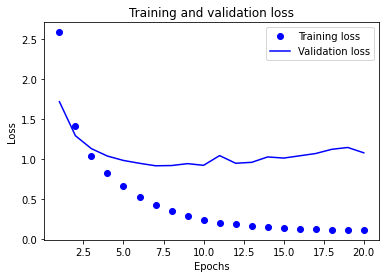

In [20]:
import matplotlib.pyplot as plt;

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


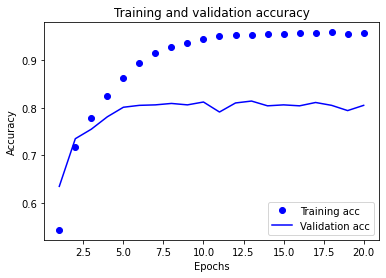

In [21]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [23]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 3ms/step - loss: 1.2172 - accuracy: 0.7890


In [24]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 68ms/step - loss: 2.4900 - accuracy: 0.5215 - val_loss: 1.6663 - val_accuracy: 0.6260
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.3892 - accuracy: 0.6993 - val_loss: 1.2984 - val_accuracy: 0.6970
Epoch 3/9
16/16 [==============================] - 1s 43ms/step - loss: 1.0478 - accuracy: 0.7662 - val_loss: 1.1473 - val_accuracy: 0.7550
Epoch 4/9
16/16 [==============================] - 1s 45ms/step - loss: 0.8274 - accuracy: 0.8175 - val_loss: 1.0396 - val_accuracy: 0.7670
Epoch 5/9
16/16 [==============================] - 1s 42ms/step - loss: 0.6639 - accuracy: 0.8558 - val_loss: 0.9753 - val_accuracy: 0.7920
Epoch 6/9
16/16 [==============================] - 1s 43ms/step - loss: 0.5322 - accuracy: 0.8862 - val_loss: 0.9426 - val_accuracy: 0.8050
Epoch 7/9
16/16 [==============================] - 1s 42ms/step - loss: 0.4265 - accuracy: 0.9119 - val_loss: 0.9405 - val_accuracy: 0.8020
Epoch 8/9
16/16 [===

In [32]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)) / len(test_labels))

0.19323241317898487


**Predict house prices - Regression example**

In [33]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

57344/57026 [==============================] - 0s 0us/step


In [34]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(1))
  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model


In [40]:
# K-Fold validation

import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
  print('processing fold #', i)
  val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]

  partial_train_data = np.concatenate([train_data[:i * num_val_samples], train_data[(i+1) * num_val_samples:]], axis=0)
  partial_train_target = np.concatenate([train_targets[:i * num_val_samples], train_targets[(i+1) * num_val_samples:]],
                                        axis=0)

  model = build_model()
  history = model.fit(partial_train_data, partial_train_target, validation_data=(val_data, val_targets), 
                      epochs=num_epochs, batch_size=1, verbose=0)
  val_mae = history.history['val_mae']
  all_mae_histories.append(val_mae)



processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


AttributeError: ignored

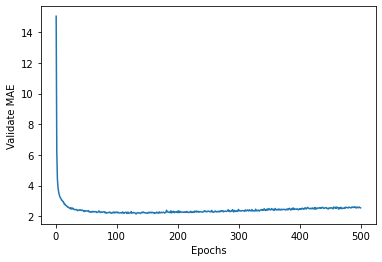

In [44]:
average_mae_history = [ np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs) ]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validate MAE')
plt.show()

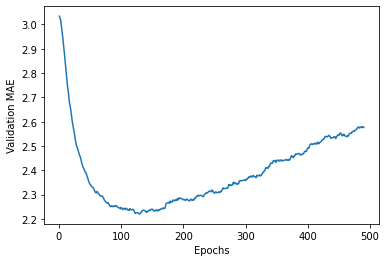

In [46]:
# use EMA to obtain smooth curve
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.clf()
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [52]:
model = build_model()
model.fit(train_data, train_targets, epochs=140, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)
print(test_mae_score)

4/4 [==============================] - 0s 2ms/step - loss: 18.4966 - mae: 2.7661
2.766077756881714
